In [1]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import shap
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from helper import read_imdb_split,download_data
np.random.seed(1337)
shap.initjs()

/Users/johanneswidera/Uni/bachelorarbeit/Code/hugging-face/HUGGING_ENV/lib/python3.9/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/Users/johanneswidera/Uni/bachelorarbeit/Code/hugging-face/HUGGING_ENV/lib/python3.9/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-

In [2]:
download_data()

'Already downloaded and extracted.'

In [3]:
texts, labels = read_imdb_split('../data/aclImdb/train')

In [4]:
data = pd.DataFrame({'text':texts, 'labels':labels})

len(data)

25000

In [5]:
stopwords_set = set(stopwords.words('english'))

tag_map = defaultdict(lambda: wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

word_Lemmatized = WordNetLemmatizer()

def preprocessing(text):
    # Using list comprehension to generate the final words
    final_words = [
        word_Lemmatized.lemmatize(word, tag_map[tag[0]])
        for word, tag in pos_tag(text)
        if word.isalpha() and word not in stopwords_set
    ]
    return ' '.join(final_words)

In [6]:
# Step - a : Remove blank rows if any.
data['text'].dropna(inplace=True)
# Step - b : Change all the text to lower case. This is required as python interprets 'dog' and 'DOG' differently
data['text'] = [entry.lower() for entry in data['text']]
# Step - c : Tokenization : In this each entry in the corpus will be broken into set of words
data['text']= [word_tokenize(entry) for entry in data['text']]
# Step - d : Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.

data['text_final'] = data['text'].apply(preprocessing)

In [7]:
corpus = data['text_final'].tolist()
labels = data['labels'].tolist()

corpus_train, corpus_test, y_train, y_test = model_selection.train_test_split(corpus,labels,test_size=0.2)

In [8]:
vectorizer = TfidfVectorizer(min_df=10)
X_train = vectorizer.fit_transform(corpus_train)
X_test = vectorizer.transform(corpus_test)

In [9]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [10]:
sklearn.metrics.accuracy_score(model.predict(X_test), y_test)

0.7216

In [66]:
masker = shap.maskers.Text(r"\W") # this will create a basic whitespace tokenizer
explainer = shap.Explainer(model.predict_proba, masker)



In [75]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('vectorizer', vectorizer), ('model', model)])

In [76]:
pipe.fit(corpus_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer(min_df=10)),
                ('model', DecisionTreeClassifier())])

In [87]:
pipe.score(corpus_test, y_test)

0.724

In [135]:
masker = shap.maskers.Text(r"\W") # this will create a basic whitespace tokenizer
explainer = shap.Explainer(pipe.predict_proba, masker)

In [136]:
shap_values = explainer(corpus_test[:1000])

KeyboardInterrupt: 

musically speak irving berlin give fred astaire ginger rogers another pluperfect musical top hat possible although case like jerome kern confection roberta follow fleet retain randolph scott another singer time harriet br br randolph scott career navy cpo fred astaire enlist navy forget ginger rogers former partner two shore leave fred ginger take right leave randy accidentally meet ginger dowdy sister harriet blossom real beauty randy typical love leave sailor br br irving berlin write hit fill score tightly supervise production ginger get really outstanding vocalize let go fred later dance real hit show let face music dance number do navy show sung first astaire later dance pair let face music dance one great romantic number ever write screen dancing one absolute br br sure mention harriet hilliard young people might ask know immediately mention conjunction famous husband ozzie nelson right ozzie harriet something mystery harriet stop sing become david ricky mom television even keep 

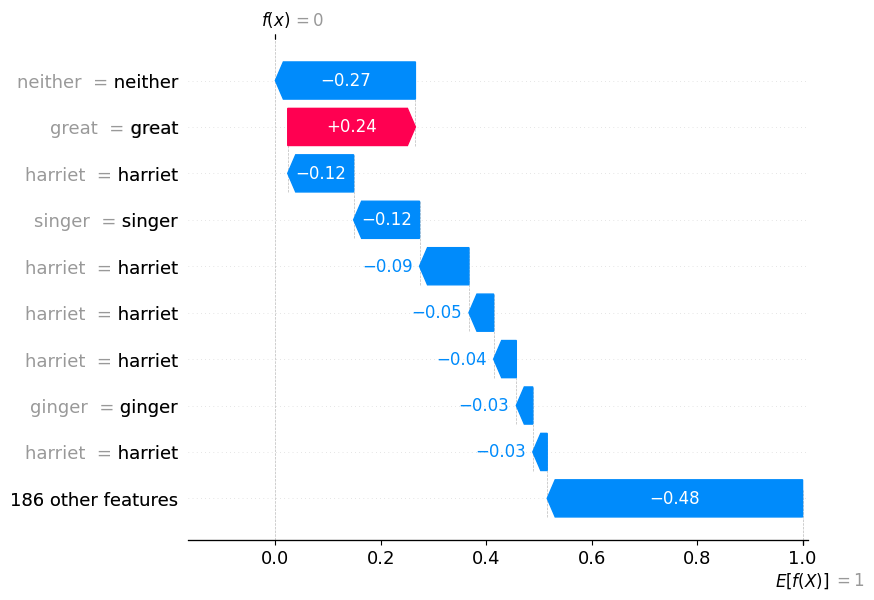

In [129]:
print(corpus_test[1])
shap.plots.waterfall(shap_values[1,:, 1])

always tell people enchant april adult movie cussing sex violence one might think ultimate chick flick bet one two enlighten men love invite kid though movie br br see enchant april healing experience sound track gorgeous scenery along lady gentle manner bring mind peace beauty br br l anyone think truly watch one kind movie paraphrase line hear saturday night live say two favorite movie deer hunter enchant april
1


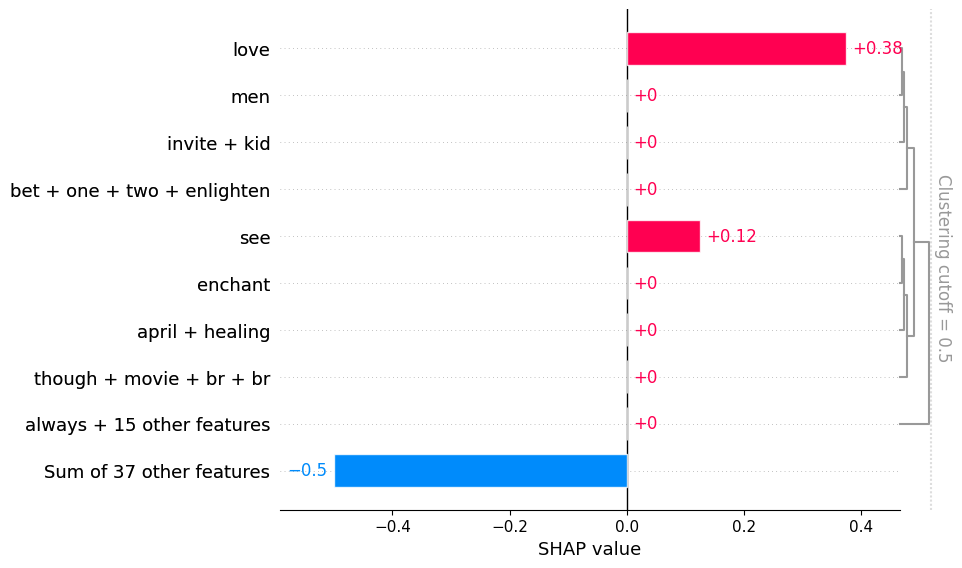

In [143]:
print(corpus_test[200])
print(y_test[200])
shap.plots.bar(shap_values[200, :, 1])

In [144]:
print(corpus_test[200])
print(y_test[200])
shap.plots.force(shap_values[200, :, 1])

always tell people enchant april adult movie cussing sex violence one might think ultimate chick flick bet one two enlighten men love invite kid though movie br br see enchant april healing experience sound track gorgeous scenery along lady gentle manner bring mind peace beauty br br l anyone think truly watch one kind movie paraphrase line hear saturday night live say two favorite movie deer hunter enchant april
1


funny movie idea whether translate well language however think men world identify frank thought extent thought hugely entertaining woman also enjoy movie sure br br cast member perform well film could tremendous hit world make england u fortunate enough understand swedish treat br br highly recommend
1


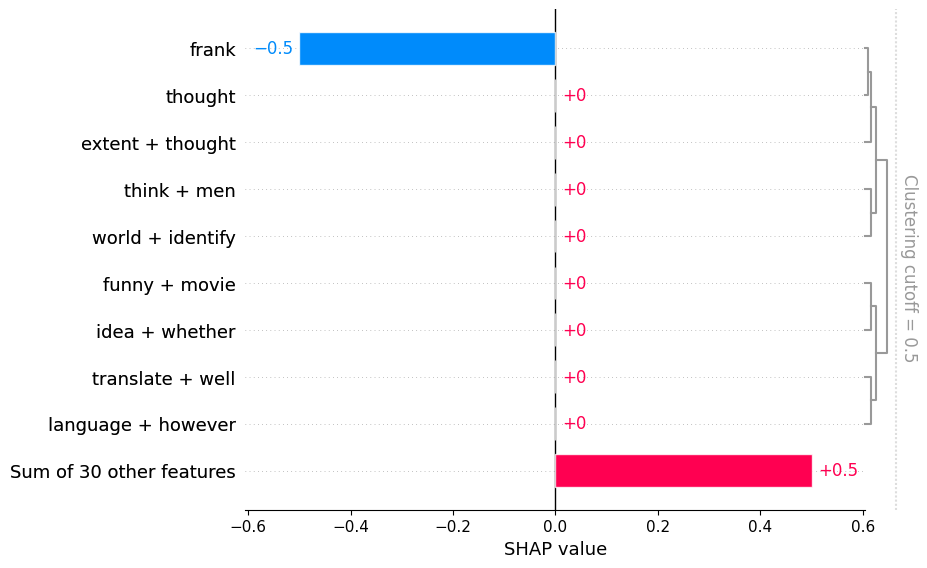

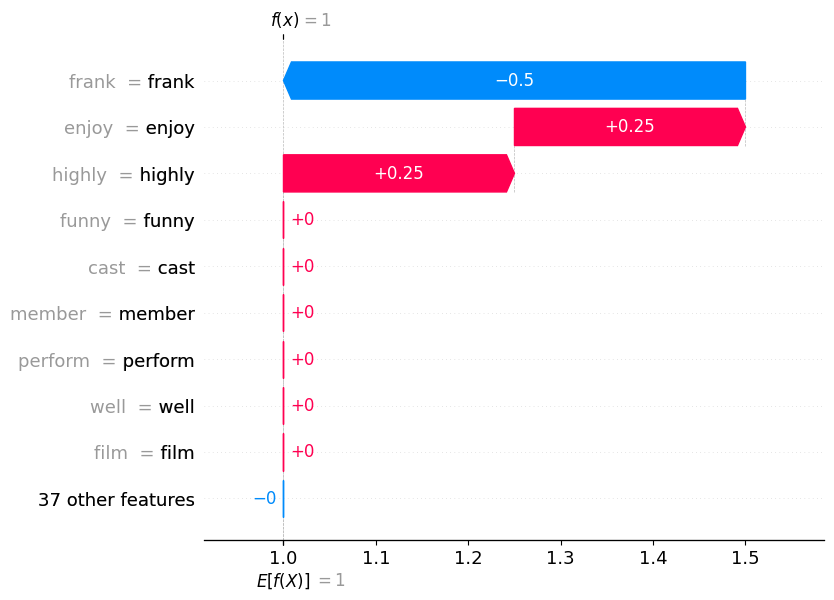

In [150]:
print(corpus_test[220])
print(y_test[220])
shap.plots.force(shap_values[220, :, 1])
shap.plots.bar(shap_values[220, :, 1])
shap.plots.waterfall(shap_values[220, :, 1])